# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
try:
    df_1 = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/calls.csv")
except:
    df_1 = pd.read_csv('/datasets/calls.csv')

df_1.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Можно заменить типы float64 и int64 для экономии памяти: 

In [5]:
df_1['duration'] = df_1['duration'].astype('float32')
df_1['user_id'] = df_1['user_id'].astype('int32')

In [6]:
try:
    df_2 = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/tariffs.csv")
except:
    df_2 = pd.read_csv('/datasets/tariffs.csv')

df_2.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [9]:
try:
    df_3 = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/users.csv")
except:
    df_3 = pd.read_csv('/datasets/users.csv')

df_3.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [10]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [11]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Изменим типы и здесь:

In [12]:
df_3['age'] = df_3['age'].astype('int32')
df_3['user_id'] = df_3['user_id'].astype('int32')

In [13]:
try:
    df_4 = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/internet.csv")
except:
    df_4 = pd.read_csv('/datasets/internet.csv')

df_4.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [14]:
df_4.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


In [15]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [16]:
df_4['mb_used'] = df_4['mb_used'].astype('float32')
df_4['user_id'] = df_4['user_id'].astype('int32')

In [17]:
try:
    df_5 = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/messages.csv")
except:
    df_5 = pd.read_csv('/datasets/messages.csv')

df_5.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [18]:
df_5.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


In [19]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [20]:
df_5['user_id'] = df_5['user_id'].astype('int32')

## Подготовка данных

Для начала, проверим наши датасеты на наличие дубликатов:

In [21]:
df_1.duplicated().sum()

0

In [22]:
df_2.duplicated().sum()

0

In [23]:
df_3.duplicated().sum()

0

In [24]:
df_4.duplicated().sum()

0

In [25]:
df_5.duplicated().sum()

0

Проверим столбцы с данными в третьем датасете на наличие скрытых дубликатов:

In [26]:
df_3['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [27]:
df_3['first_name'].unique()

array(['Рафаил', 'Иван', 'Евгений', 'Белла', 'Татьяна', 'Афанасий',
       'Леонид', 'Юна', 'Рустэм', 'Василиса', 'Эдуард', 'Веселина',
       'Варлам', 'Борис', 'Яков', 'Рузана', 'Марица', 'Мария', 'Матвей',
       'Игнатий', 'Тала', 'Святослав', 'Людмила', 'Иулиан', 'Владислав',
       'Рустем', 'Алексей', 'Мариетта', 'Лаврентий', 'Инна', 'Лия',
       'Розалия', 'Анжелика', 'Изольда', 'Агнесса', 'Юрий', 'Михаил',
       'Константин', 'Марианна', 'Иннокентий', 'Джемма', 'Екатерина',
       'Милица', 'Лола', 'Габриель', 'Кристина', 'Павел', 'Ренальд',
       'Луиза', 'Радислав', 'Динара', 'Лукий', 'Глеб', 'Тамара',
       'Александр', 'Таира', 'Роза', 'Исак', 'Юзефа', 'Ким', 'Гордей',
       'Эльза', 'Гектор', 'Андрей', 'Рафаэль', 'Фёдор', 'Харитон',
       'Еремей', 'Всеволод', 'Софья', 'Авксентий', 'Виолетта', 'Ириней',
       'Гелена', 'Ксения', 'Вера', 'Вениамин', 'Вероника', 'Даниэла',
       'Алла', 'Элеонора', 'Аюна', 'Руслан', 'Онисим', 'Марта', 'Эльвира',
       'Габриэль', '

In [28]:
df_3['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

Проверим, нет ли в датасете пользователей, чья дата прекращения пользования тарифом наступила раньше, чем дата подключения тарифа.

In [29]:
df_3.query('churn_date<=reg_date')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


Округлим длительность звонков в верхнюю сторону:

In [30]:
df_1['duration'] = np.ceil(df_1['duration'])

Переведем мегабайты в гигабайты и округлим в верхнюю сторону:


In [31]:
df_4['gb_used'] = df_4['mb_used']/1024
df_4.head()

,Unnamed: 0,id,mb_used,session_date,user_id,gb_used
0,0,1000_0,112.949997,2018-11-25,1000,0.110303
1,1,1000_1,1052.810059,2018-09-07,1000,1.028135
2,2,1000_2,1197.260010,2018-06-25,1000,1.169199
3,3,1000_3,550.270020,2018-08-22,1000,0.537373
4,4,1000_4,302.559998,2018-09-24,1000,0.295469


Каких-либо явных ошибок обнаружено не было. Данные по звонкам и интернет-трафику были приведены в соответствие с правилами учета данных компанией.

Рассчитаем количество сделанных звонков и израсходованных минут разговора по месяцам. Сначала добавим столбцы, содержащие информацию про год, месяц и день:

In [32]:
df_1['call_date'] = pd.to_datetime(df_1['call_date'], format='%Y-%m-%d')
df_1['year'] = df_1['call_date'].dt.year
df_1['month'] = df_1['call_date'].dt.month
df_1['weekday'] = df_1['call_date'].dt.weekday
display(df_1.head(10))

,id,call_date,duration,user_id,year,month,weekday
0,1000_0,2018-07-25,0.0,1000,2018,7,2
1,1000_1,2018-08-17,0.0,1000,2018,8,4
2,1000_2,2018-06-11,3.0,1000,2018,6,0
3,1000_3,2018-09-21,14.0,1000,2018,9,4
4,1000_4,2018-12-15,6.0,1000,2018,12,5
5,1000_5,2018-11-02,0.0,1000,2018,11,4
6,1000_6,2018-10-18,0.0,1000,2018,10,3
7,1000_7,2018-08-22,19.0,1000,2018,8,2
8,1000_8,2018-09-15,19.0,1000,2018,9,5
9,1000_9,2018-08-15,0.0,1000,2018,8,2


Построим сводную таблицу:

In [33]:

calls_by_month = df_1.pivot_table(index=['user_id','month'],values=['duration','id'],aggfunc={'duration': 'sum','id':'count'}).reset_index()
calls_by_month.head(10)


,user_id,month,duration,id
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
5,1000,10,350.0,57
6,1000,11,338.0,43
7,1000,12,333.0,46
8,1001,11,430.0,59
9,1001,12,414.0,63


Рассчитаем отправленных сообщений по месяцам. Сначала так же добавим столбцы, содержащие информацию про год, месяц и день:

In [34]:
df_5['message_date'] = pd.to_datetime(df_5['message_date'], format='%Y-%m-%d')
df_5['year'] = df_5['message_date'].dt.year
df_5['month'] = df_5['message_date'].dt.month
df_5['weekday'] = df_5['message_date'].dt.weekday
display(df_5.head(10))

,id,message_date,user_id,year,month,weekday
0,1000_0,2018-06-27,1000,2018,6,2
1,1000_1,2018-10-08,1000,2018,10,0
2,1000_2,2018-08-04,1000,2018,8,5
3,1000_3,2018-06-16,1000,2018,6,5
4,1000_4,2018-12-05,1000,2018,12,2
5,1000_5,2018-06-20,1000,2018,6,2
6,1000_6,2018-11-19,1000,2018,11,0
7,1000_7,2018-10-29,1000,2018,10,0
8,1000_8,2018-06-25,1000,2018,6,0
9,1000_9,2018-12-18,1000,2018,12,1


In [35]:
messages_by_month = df_5.pivot_table(index=['user_id','month'],values=['id'],aggfunc={'id':'count'}).reset_index()
messages_by_month.head(10)

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


Теперь изучим объем израсходованного интернет-трафика по месяцам. Аналогично предыдущим датасетам, разобъем столбец с датой на три:

In [36]:
df_4['session_date'] = pd.to_datetime(df_4['session_date'], format='%Y-%m-%d')
df_4['year'] = df_4['session_date'].dt.year
df_4['month'] = df_4['session_date'].dt.month
df_4['weekday'] = df_4['session_date'].dt.weekday
display(df_4.head(10))

,Unnamed: 0,id,mb_used,session_date,user_id,gb_used,year,month,weekday
0,0,1000_0,112.949997,2018-11-25,1000,0.110303,2018,11,6
1,1,1000_1,1052.810059,2018-09-07,1000,1.028135,2018,9,4
2,2,1000_2,1197.260010,2018-06-25,1000,1.169199,2018,6,0
3,3,1000_3,550.270020,2018-08-22,1000,0.537373,2018,8,2
4,4,1000_4,302.559998,2018-09-24,1000,0.295469,2018,9,0
5,5,1000_5,399.970001,2018-10-02,1000,0.390596,2018,10,1
6,6,1000_6,540.080017,2018-09-07,1000,0.527422,2018,9,4
7,7,1000_7,415.700012,2018-07-11,1000,0.405957,2018,7,2
8,8,1000_8,505.399994,2018-10-08,1000,0.493555,2018,10,0
9,9,1000_9,345.540009,2018-09-03,1000,0.337441,2018,9,0


In [37]:
internet_by_month = df_4.pivot_table(index=['user_id','month'],values=['gb_used'],aggfunc={'gb_used':'sum'}).reset_index()
internet_by_month['gb_used']=np.ceil(internet_by_month['gb_used'])
internet_by_month.head(10)

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
5,1000,10,15.0
6,1000,11,15.0
7,1000,12,10.0
8,1001,11,18.0
9,1001,12,14.0


In [38]:
#calls_by_month.merge(messages_by_month,on='user_id').merge(internet_by_month,on='user_id')

In [39]:
calls_by_month.head(10)

,user_id,month,duration,id
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
5,1000,10,350.0,57
6,1000,11,338.0,43
7,1000,12,333.0,46
8,1001,11,430.0,59
9,1001,12,414.0,63


Теперь объединим 3 датасета так, чтобы видеть информацию по используемым тарифам:

In [40]:
total_by_month = calls_by_month.merge(messages_by_month,how ='outer').merge(internet_by_month,how ='outer')
total_by_month.head()

,user_id,month,duration,id,gb_used
0,1000,5,159.0,22.0,3.0
1,1000,6,172.0,43.0,23.0
2,1000,6,NaN,60.0,23.0
3,1000,7,340.0,47.0,14.0
4,1000,7,NaN,75.0,14.0


In [41]:
total_revenue = total_by_month.merge(df_3,how ='left')
total_revenue.head()

,user_id,month,duration,id,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,43.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,6,NaN,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,7,340.0,47.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,7,NaN,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Наконец, найдем помесячную выручку с каждого пользователя:

In [42]:
def total(row):
    duration = 0
    gb_used = 0
    messages = 0
    if row['tariff'] == 'ultra' :
        if row['duration']-3000>0:
            duration = (row['duration']-3000)*1
        if row['gb_used']-30>0:
             gb_used = (row['gb_used']-30)*150
        if row['id']-1000>0:
            messages = (row['id']-1000)*1
        return duration + gb_used + messages + 1950
    elif row['tariff'] == 'smart':
        if row['duration']-500>0:
            duration = (row['duration']-500)*3
        if row['gb_used']-15>0:
            gb_used = (row['gb_used']-15)*200
        if row['id']-50>0:
            messages = (row['id']-50)*3
        return duration + gb_used + messages + 550
              
total_revenue['revenue'] = total_revenue.apply(lambda row: total(row), axis=1)
display(total_revenue.head(10))

,user_id,month,duration,id,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue
0,1000,5,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
1,1000,6,172.0,43.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
2,1000,6,NaN,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
3,1000,7,340.0,47.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
4,1000,7,NaN,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
5,1000,8,408.0,52.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
6,1000,8,NaN,81.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
7,1000,9,466.0,58.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
8,1000,9,NaN,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
9,1000,10,350.0,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0


Возможно, некоторые месяцы абоненты не использовали одновременно все 3 вида связи сразу. Проверим, так ли это:

In [43]:
total_revenue[total_revenue['revenue'].isna()]

,user_id,month,duration,id,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue


## Анализ данных

Изучим помесячную статистику звонков пользователей. Сначала рассчитаем среднее значение, медиану, дисперсию и стандартное отклонение для тарифа Смарт: 

In [44]:
total_revenue.head()

,user_id,month,duration,id,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue
0,1000,5,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
1,1000,6,172.0,43.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
2,1000,6,NaN,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
3,1000,7,340.0,47.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
4,1000,7,NaN,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0


In [45]:
total_revenue['duration'][total_revenue['tariff']=='smart'].mean()


419.063

In [46]:
total_revenue['duration'][total_revenue['tariff']=='smart'].median()

423.0

In [47]:
np.var(total_revenue['duration'][total_revenue['tariff']=='smart'])

35828.066

In [48]:
np.std(total_revenue['duration'][total_revenue['tariff']=='smart'])

189.28304

Построим гистограмму:

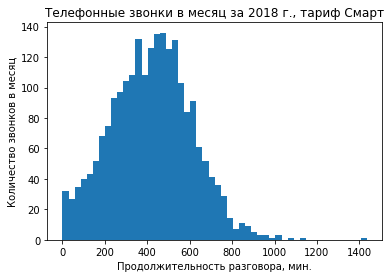

In [49]:
plt.hist(total_revenue['duration'][total_revenue['tariff']=='smart'], bins=50)
plt.ylabel('Количество звонков в месяц')
plt.xlabel('Продолжительность разговора, мин.')
plt.title("Телефонные звонки в месяц за 2018 г., тариф Смарт")
plt.show();

Теперь сравним полученные начения с тарифом Ультра:

In [50]:
total_revenue['duration'][total_revenue['tariff']=='ultra'].mean()

545.4511

In [51]:
total_revenue['duration'][total_revenue['tariff']=='ultra'].median()

528.0

In [52]:
np.var(total_revenue['duration'][total_revenue['tariff']=='ultra'])

94104.36

In [53]:
np.std(total_revenue['duration'][total_revenue['tariff']=='ultra'])

306.76434

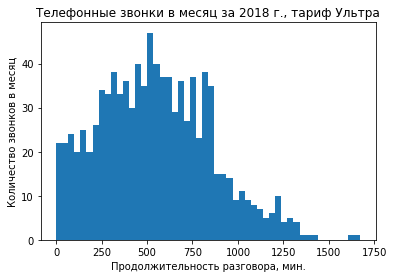

In [54]:
plt.hist(total_revenue['duration'][total_revenue['tariff']=='ultra'], bins=50)
plt.ylabel('Количество звонков в месяц')
plt.xlabel('Продолжительность разговора, мин.')
plt.title("Телефонные звонки в месяц за 2018 г., тариф Ультра")
plt.show();

Получились датасеты с существенной положительной скошенностью. При этом, у тарифа Смарт распределние сходно с нормальным в отличие от тарифа Ультра. Дисперсия и стандартное отклонение у тарифа Смарт заметно ниже.

Применим аналогичный алгоритм действий к количеству сообщений:

In [55]:
total_revenue['id'][total_revenue['tariff']=='smart'].mean()


49.454832442933466

In [56]:
total_revenue['id'][total_revenue['tariff']=='smart'].median()

48.0

In [57]:
np.var(total_revenue['id'][total_revenue['tariff']=='smart'])

788.1445116159265

In [58]:
np.std(total_revenue['id'][total_revenue['tariff']=='smart'])

28.073911583816148

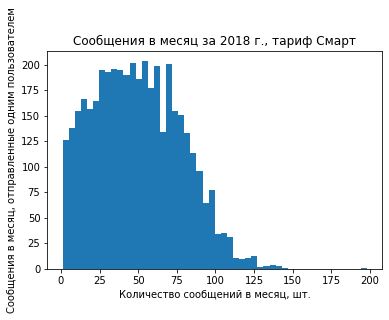

In [59]:
plt.hist(total_revenue['id'][total_revenue['tariff']=='smart'], bins=50)
plt.ylabel('Сообщения в месяц, отправленные одним пользователем')
plt.xlabel('Количество сообщений в месяц, шт.')
plt.title("Сообщения в месяц за 2018 г., тариф Смарт")
plt.show();

In [60]:
total_revenue['id'][total_revenue['tariff']=='ultra'].mean()


69.3580459770115

In [61]:
total_revenue['id'][total_revenue['tariff']=='ultra'].median()

65.0

In [62]:
np.var(total_revenue['id'][total_revenue['tariff']=='ultra'])

1995.2574352622537

In [63]:
np.std(total_revenue['id'][total_revenue['tariff']=='ultra'])

44.66830459355105

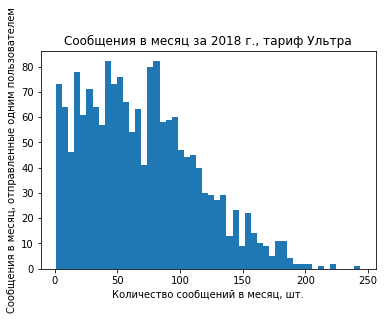

In [64]:
plt.hist(total_revenue['id'][total_revenue['tariff']=='ultra'], bins=50)
plt.ylabel('Сообщения в месяц, отправленные одним пользователем')
plt.xlabel('Количество сообщений в месяц, шт.')
plt.title("Сообщения в месяц за 2018 г., тариф Ультра")
plt.show();

Выводы схожи с полученными по статистике звонков. Дисперсия и стандартное отклонение у тарифа Смарт вновь заметно ниже. На обеих гистограммах видна существенная положительная скошенность.

Применим аналогичный алгоритм действий к объему интернет-трафика:

In [65]:
total_revenue['gb_used'][total_revenue['tariff']=='smart'].mean()


16.363945

In [66]:
total_revenue['gb_used'][total_revenue['tariff']=='smart'].median()

17.0

In [67]:
np.var(total_revenue['gb_used'][total_revenue['tariff']=='smart'])

32.49388

In [68]:
np.std(total_revenue['gb_used'][total_revenue['tariff']=='smart'])

5.7003403

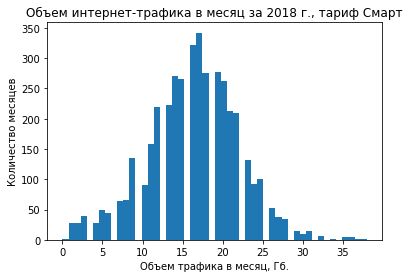

In [69]:
plt.hist(total_revenue['gb_used'][total_revenue['tariff']=='smart'], bins=50)
plt.ylabel('Количество месяцев')
plt.xlabel('Объем трафика в месяц, Гб.')
plt.title("Объем интернет-трафика в месяц за 2018 г., тариф Смарт")
plt.show();

Теперь сравним полученные начения с тарифом Ультра:

In [70]:
total_revenue['gb_used'][total_revenue['tariff']=='ultra'].mean()


19.676352

In [71]:
total_revenue['gb_used'][total_revenue['tariff']=='ultra'].median()

19.0

In [72]:
np.var(total_revenue['gb_used'][total_revenue['tariff']=='ultra'])

91.214836

In [73]:
np.std(total_revenue['gb_used'][total_revenue['tariff']=='ultra'])

9.550646

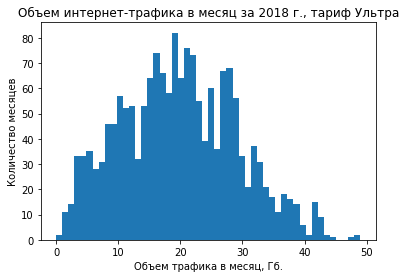

In [74]:
plt.hist(total_revenue['gb_used'][total_revenue['tariff']=='ultra'], bins=50)
plt.ylabel('Количество месяцев')
plt.xlabel('Объем трафика в месяц, Гб.')
plt.title("Объем интернет-трафика в месяц за 2018 г., тариф Ультра")
plt.show();

По тарифу Смарт получился датасет с нормальным распределением. У тарифа Ультра присутствует некоторая положительная скошенность. Дисперсия и стандартное отклонение у тарифа Смарт ниже, чем у тарифа Ультра, но не так сильно, как в предыдущих двух метриках.

Вывод: стандартное отклонение и распределение трех вышеописанных метрик существенно отличаются. Нормальное распределение интернет-трафика может свидетельствовать о схожей потребности большинства пользователей в объемах трафика в месяц. Продолжительность звонков и количество сообщений гораздо сильнее разнится, что может свидетельствовать о сильно отличающихся предпочтениях отдельных пользователей. Например, кто-то любит часами говорить по телефону, а кому-то хватает и нескольких минут в месяц. Существенные различия между распределением по тарифам являются следствием различных условий, заложенных в тарифных пакетах - тариф Ультра имеет куда больший диапазон по объемам всех используемых средств связи.    

## Проверка гипотез

Сначала проверим гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Необходимо сравнить средние двух генеральных совокупностей между собой. Пусть нулевая гипотеза (H0) гласит, что средняя выручка пользователей двух тарифов одинаковы. Тогда альтернативная гипотеза (H1) говорит о том, что они различны.

In [75]:
sample_ultra = list(total_revenue[total_revenue['tariff'] == 'ultra']['revenue'])

In [76]:
sample_smart = list(total_revenue[total_revenue['tariff'] == 'smart']['revenue'])

Пусть критический уровень статистической значимости будет равен 5%.

In [77]:
alpha = .05

In [78]:
results = st.ttest_ind(
    sample_ultra, 
    sample_smart)

In [79]:
print('p-значение: ', results.pvalue)

p-значение:  0.0


In [80]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


При полученном p-значении можно утверждать, что средняя выручка пользователей тарифов «Ультра» и «Смарт» действительно различаются.

Теперь проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Пусть нулевая гипотеза (H0) гласит, что средняя выручка пользователей Москвы и всех других регионов одинаковы. Тогда альтернативная гипотеза (H1) говорит о том, что они различны.

In [81]:
sample_moscow = list(total_revenue[total_revenue['city'] == 'Москва']['revenue'])

In [82]:
sample_regions = list(total_revenue[total_revenue['city'] != 'Москва']['revenue'])

Пусть критический уровень статистической значимости также будет равен 5%. Также укажем значение equal_var = False, так как выборки явно отличаются по размеру.

In [83]:
alpha = .05

In [84]:
results_1 = st.ttest_ind(
    sample_moscow, 
    sample_regions,
    equal_var = False)

In [85]:
print('p-значение: ', results_1.pvalue)

p-значение:  0.035433225708539955


In [86]:
if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


При полученном p-значении можно утверждать, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод

Мы проанализировали базу данных телеком-компании «Мегалайн» с целью определения перспективного тарифа. В ходе анализы была найдена выручка с учетом количества минут разговора, отправленных сообщений и объемов интернет-трафика. Были рассчитаны среднее значение, медиана, дисперсия и стандартное отклонение каждой метрики для обоих тарифов. По ним были также построены гистограммы распределения. Наконец, были проверены гипотезы о различиях средней выручки пользователей по тарифам и по регионам. Проведенный анализ позволяет сделать следующие выводы:

1) Стандартное отклонение и распределение трех вышеописанных метрик существенно отличаются. Различия между распределением по тарифам являются следствием различных условий, заложенных в тарифных пакетах - тариф Ультра имеет куда больший диапазон по объемам всех используемых средств связи. Нормальное распределение интернет-трафика может свидетельствовать о схожей потребности большинства пользователей в объемах трафика в месяц. Продолжительность звонков и количество сообщений гораздо сильнее разнится, что может свидетельствовать о сильно отличающихся предпочтениях отдельных пользователей. Например, кто-то любит часами говорить по телефону, а кому-то хватает и нескольких минут в месяц.   

2) Средняя помесячная выручка пользователей тарифов «Ультра» и «Смарт» различаются.

3) Средняя помесячная выручка пользователей из Москвы и средняя помесячная выручка пользователей из других регионов различаются.

В целом, можно сделать вывод о том, что тариф Смарт выглядит более предпочитетельным для компании, так как его тарифный пакет значительно дешевле, что ведет к его куда большей популярности среди пользователей. При этом, объемов, включенных в тариф, явно не хватает многим пользователям, что приводит их к необходимости зачастую переплачивать, что в сумме дает больший экономический эффект по сравнению с более дорогим, но более гибким тарифным пакетом Ультра.